In [1]:
import pandas as pd
import kagglehub
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

c:\Users\gabriel.aguirre\Documents\ML_aguirre\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = os.path.join(path, "winequality-red.csv")
df_wine = pd.read_csv(file_path)

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print('Dataset shape', df_wine.shape)

Dataset shape (1599, 12)


In [4]:
df_wine.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [7]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='str')

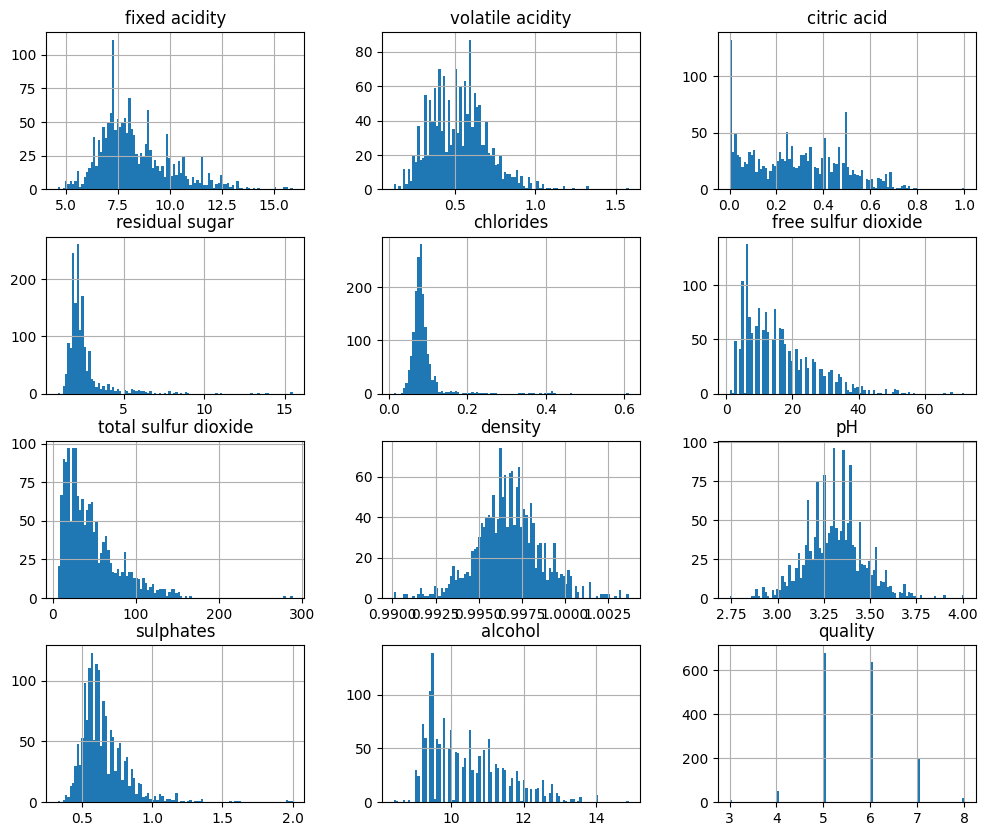

In [8]:
df_wine.hist(bins=100, figsize=(12,10))
plt.show()

In [9]:
# Correlação 
corr_matrix = df_wine.corr(numeric_only=True)

# Correlação em relação a qualidade do vinho
corr_matrix['quality'].sort_values(ascending=False).round(2)

quality                 1.00
alcohol                 0.48
sulphates               0.25
citric acid             0.23
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64

<Axes: xlabel='quality'>

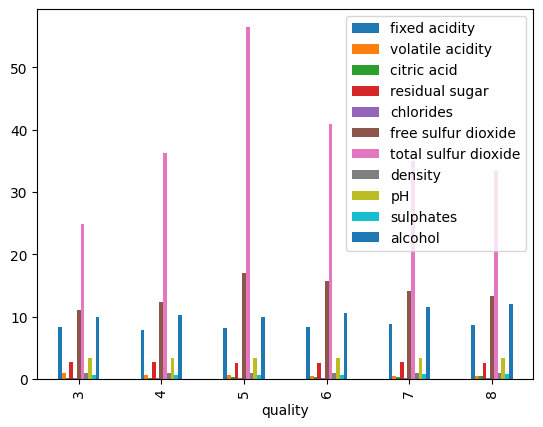

In [10]:
# Qualidade média 
average_quality = df_wine.groupby('quality').mean()

average_quality.plot(kind='bar')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

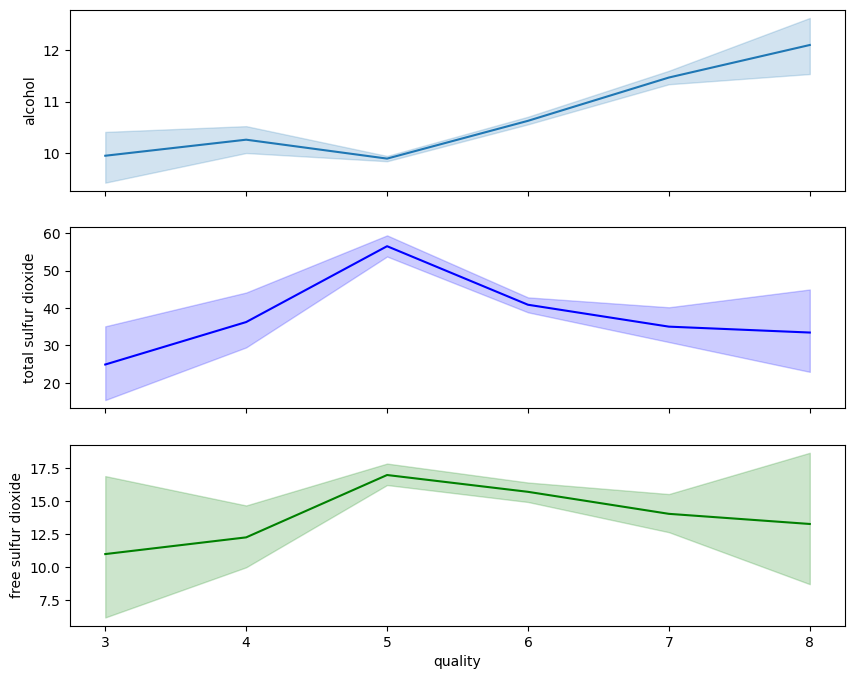

In [11]:
fig, axes =  plt.subplots(3,1, figsize=(10,8), sharex=True)

plt.sca(axes[0])
sns.lineplot(data=df_wine, x='quality', y='alcohol')

plt.sca(axes[1])
sns.lineplot(data=df_wine, x='quality', y='total sulfur dioxide', color='b')

plt.sca(axes[2])
sns.lineplot(data=df_wine, x='quality', y='free sulfur dioxide', color='g')


## ML MODELS

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Import de modelos 
# ----------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [14]:
# Dados sem labels
X = df_wine.drop('quality', axis=1)

# Somente labels dos dados
y = df_wine['quality'].copy()

In [15]:
def split_scaled_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=y)
    # Deixando dados na mesma escala
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

X_train_scaled, X_test_scaled, y_train, y_test = split_scaled_data(X,y)

In [16]:
models = {
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'KNeighbors Classifier':KNeighborsClassifier(n_neighbors=5),
    'Random Forest Classifier':RandomForestClassifier(n_estimators=1000,
                                                      max_depth=6, 
                                                      random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(n_estimators=1000,
                                                              random_state=42, 
                                                              n_iter_no_change=10)
}

In [17]:
model_accuracies = {}
def model_analysis(models, model_accuracies, 
                   X_train_scaled, y_train, 
                   X_test_scaled, y_test):
    
    for name, model in models.items():

        # Ensinando modelos
        model.fit(X_train_scaled, y_train)

        # Score de precisão no treino e test
        score_in_train = model.score(X_train_scaled, y_train) 

        score_in_test = model.score(X_test_scaled, y_test)

        # Salvando precisões
        model_accuracies[name] = [score_in_train, score_in_test]

        print('-'*40)
        print(f'{name}')
        print(f'score do modelo no treino', round(score_in_train, 3))
        print(f'score do modelo no teste', round(score_in_test,3))
        print(f'cross_val_score do modelo no teste', cross_val_score(model, X_train_scaled, y_train, cv=3))

    return model_accuracies

model_accuracies = model_analysis(models, model_accuracies, 
                   X_train_scaled, y_train, 
                   X_test_scaled, y_test)

----------------------------------------
Logistic Regression
score do modelo no treino 0.609
score do modelo no teste 0.591
cross_val_score do modelo no teste [0.58548009 0.62206573 0.57981221]
----------------------------------------
KNeighbors Classifier
score do modelo no treino 0.709
score do modelo no teste 0.609
cross_val_score do modelo no teste [0.56908665 0.58215962 0.51173709]
----------------------------------------
Random Forest Classifier
score do modelo no treino 0.752
score do modelo no teste 0.622
cross_val_score do modelo no teste [0.62529274 0.64319249 0.62206573]
----------------------------------------
Gradient Boosting Classifier
score do modelo no treino 0.823
score do modelo no teste 0.634
cross_val_score do modelo no teste [0.64168618 0.64788732 0.57276995]


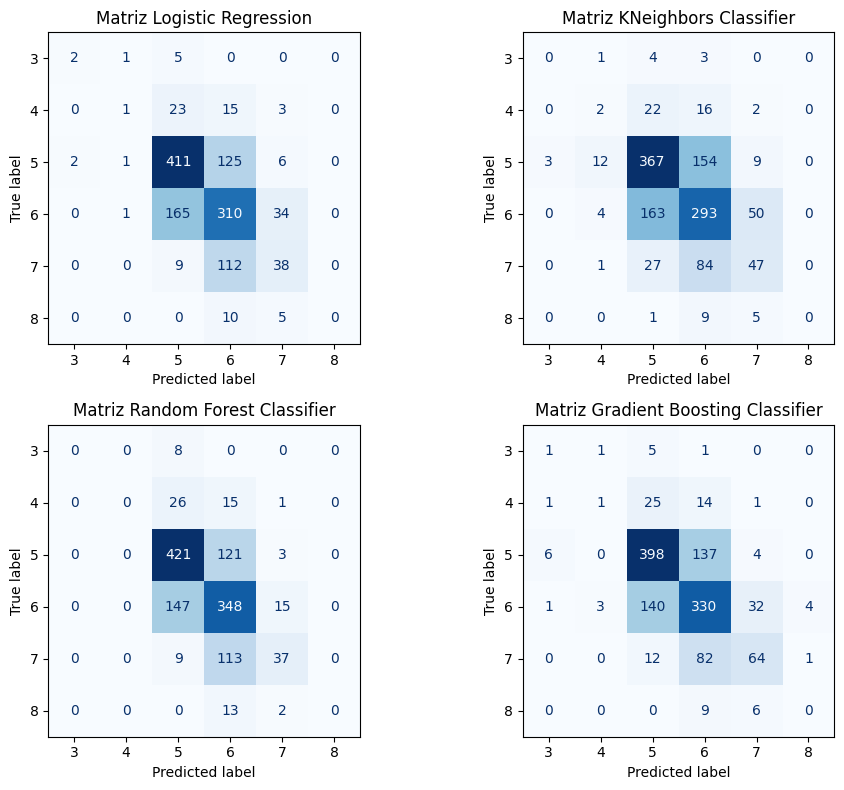

In [18]:
import numpy as np
length = len(models.keys())
cols = 2
rows = int(np.ceil(length / cols))

fig, axes = plt.subplots(ncols= cols, nrows=rows, figsize=(10,8))

axes = axes.flatten()
for (name, model), ax in zip(models.items(), axes):

    # Pegando as previsões limpas do texto
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=3)

    # Gerando matriz de confusão
    cm = confusion_matrix(y_train, y_pred)
    
    # Criando objeto de exibição
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Plot da matriz de confusão
    disp.plot(ax=ax, cmap='Blues', colorbar=False)

    ax.set_title(f'Matriz {name}')
plt.tight_layout()
plt.show()

In [19]:
print(df_wine['quality'].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [20]:
def Voting_Stacking_models(X_train_scaled, y_train,
                           X_test_scaled, y_test):
    # ----------------------------------------
    # Modelo Voting 
    # ----------------------------------------
    voting_clf = VotingClassifier(
        estimators=list(models.items()),
        voting='soft'
    )

    print('-'*40)
    voting_clf.fit(X_train_scaled, y_train)
    score_in_train = voting_clf.score(X_train_scaled, y_train)
    score_in_test = voting_clf.score(X_test_scaled, y_test)
    print('Score do modelo Voting Classifier para dados de treinamento', round(score_in_train,2))
    print('Score do modelo Voting Classifier para dados de teste', round(score_in_test,2))
    # ----------------------------------------
    # Modelo stacking
    # ----------------------------------------

    stacking_clf = StackingClassifier(
        estimators=list(models.items()),
        final_estimator=RandomForestClassifier(random_state=42), cv=5
    )

    stacking_clf.fit(X_train_scaled, y_train)

    score_in_train_stc = stacking_clf.score(X_train_scaled, y_train)
    score_in_test_stc = stacking_clf.score(X_test_scaled, y_test)
    print('-'*40)
    print('Score do modelo Stacking Classifier para dados de treinamento', round(score_in_train_stc,2))
    print('Score do modelo Stacking Classifier para dados de teste', round(score_in_test_stc,2))

    return score_in_train, score_in_test, score_in_train_stc,  score_in_test_stc

score_in_train, score_in_test, score_in_train_stc,  score_in_test_stc = Voting_Stacking_models(X_train_scaled, 
                                                                                              y_train,
                                                                                              X_test_scaled, 
                                                                                              y_test)

----------------------------------------
Score do modelo Voting Classifier para dados de treinamento 0.76
Score do modelo Voting Classifier para dados de teste 0.62
----------------------------------------
Score do modelo Stacking Classifier para dados de treinamento 0.8
Score do modelo Stacking Classifier para dados de teste 0.63


In [21]:
model_accuracies['Voting Classifier'] = [score_in_train, score_in_test]

model_accuracies['Stacking Classifier'] = [score_in_train_stc, score_in_test_stc]

In [22]:
model_accuracies = pd.DataFrame(model_accuracies, index=['Train accuracy', 'Test accuracy']).T

model_accuracies.sort_values(by='Test accuracy', ascending=False, inplace=True)

In [23]:
model_accuracies

,Train accuracy,Test accuracy
Stacking Classifier,0.795934,0.634375
Gradient Boosting Classifier,0.822518,0.634375
Random Forest Classifier,0.752150,0.621875
Voting Classifier,0.760751,0.621875
KNeighbors Classifier,0.709148,0.609375
Logistic Regression,0.609070,0.590625


# Redefinindo variáveis

In [24]:
df_wine['is_good'] = (df_wine['quality'] >= 7).astype(int)

X = df_wine.drop(['quality', 'is_good'], axis=1)
y = df_wine['is_good']

In [25]:
X_train_scaled, X_test_scaled, y_train, y_test = split_scaled_data(X,y)

In [26]:
new_model_accuracies = {}

new_model_accuracies = model_analysis(models, new_model_accuracies, 
                   X_train_scaled, y_train, 
                   X_test_scaled, y_test)

----------------------------------------
Logistic Regression
score do modelo no treino 0.882
score do modelo no teste 0.894
cross_val_score do modelo no teste [0.86885246 0.87089202 0.88497653]
----------------------------------------
KNeighbors Classifier
score do modelo no treino 0.903
score do modelo no teste 0.894
cross_val_score do modelo no teste [0.87822014 0.85680751 0.87089202]
----------------------------------------
Random Forest Classifier
score do modelo no treino 0.941
score do modelo no teste 0.925
cross_val_score do modelo no teste [0.87587822 0.88028169 0.88262911]
----------------------------------------
Gradient Boosting Classifier
score do modelo no treino 0.93
score do modelo no teste 0.912
cross_val_score do modelo no teste [0.8735363  0.86619718 0.88497653]


In [27]:
score_in_train, score_in_test, score_in_train_stc,  score_in_test_stc = Voting_Stacking_models(X_train_scaled, 
                                                                                              y_train,
                                                                                              X_test_scaled, 
                                                                                              y_test)

----------------------------------------
Score do modelo Voting Classifier para dados de treinamento 0.92
Score do modelo Voting Classifier para dados de teste 0.91
----------------------------------------
Score do modelo Stacking Classifier para dados de treinamento 0.94
Score do modelo Stacking Classifier para dados de teste 0.91


In [28]:
new_model_accuracies['Voting Classifier'] = [score_in_train, score_in_test]

new_model_accuracies['Stacking Classifier'] = [score_in_train_stc, score_in_test_stc]

new_model_accuracies = pd.DataFrame(new_model_accuracies, index=['Train accuracy', 'Test accuracy']).T

new_model_accuracies.sort_values(by='Test accuracy', ascending=False, inplace=True)

In [29]:
new_model_accuracies

,Train accuracy,Test accuracy
Random Forest Classifier,0.940579,0.925000
Gradient Boosting Classifier,0.930414,0.912500
Stacking Classifier,0.937451,0.912500
Voting Classifier,0.921032,0.909375
KNeighbors Classifier,0.903049,0.893750
Logistic Regression,0.881939,0.893750


In [30]:
import numpy as np

# Exemplo: valores hipotéticos para um novo vinho
# Ordem: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, 
# free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
novo_vinho = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.70,
    'citric acid': 0.00,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11.0,
    'total sulfur dioxide': 34.0,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

# Converter para DataFrame (o modelo espera um formato de tabela/2D)
novo_vinho_df = pd.DataFrame([novo_vinho])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
# Certifique-se de rodar isso antes da predição:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Aqui o scaler "aprende"
# 1. Colocar o novo vinho na mesma escala (usando o scaler do treino)
novo_vinho_scaled = scaler.transform(novo_vinho_df)

# 2. Escolher o seu melhor modelo (ex: o que teve 92% de acerto)
modelo_final = models['Random Forest Classifier'] # ou o Gradient Boosting

# 3. Fazer a predição
resultado = modelo_final.predict(novo_vinho_scaled)
probabilidade = modelo_final.predict_proba(novo_vinho_scaled)

# 4. Exibir o veredito
if resultado[0] == 1:
    print(f"Veredito: Vinho de ALTA QUALIDADE (Bom) 🍷")
else:
    print(f"Veredito: Vinho de qualidade COMUM 📉")

print(f"Probabilidade de ser um vinho bom: {probabilidade[0][1]:.2%}")

Veredito: Vinho de qualidade COMUM 📉
Probabilidade de ser um vinho bom: 1.25%


## Otimizando Hiperparâmetros
Otimizando os três melhores modelos para o problema

#### -Random Forest Classifier
#### -Gradient Boosting Classifier
#### -Stacking Classifier	

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [33]:
# ----------------------------------------
# Função para ver melhor parametro
# ----------------------------------------
def best_params_and_score(model_grid, x_scaled, y_for_train):
    model_grid.fit(x_scaled, y_for_train)

    print("Best RFC params:", model_grid.best_params_)
    print("Best RFC score:", model_grid.best_score_)

In [34]:
rfc_params = {
    'n_estimators':np.arange(100,1001,200),
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_depth': [3,5,8]
}

rfc_grid = GridSearchCV(RandomForestClassifier(),
                        rfc_params, 
                        cv=3, 
                        scoring='accuracy', 
                        n_jobs=4)

best_params_and_score(rfc_grid, X_train, y_train)

c:\Users\gabriel.aguirre\Documents\ML_aguirre\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RFC params: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': np.int64(900)}
Best RFC score: 0.8921067387934163


In [36]:
# grade boosting grid search semelhante ao que fizemos para o RFC

gbc_params = {
    'n_estimators': np.arange(100, 1001, 200),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gbc_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                        gbc_params,
                        cv=3,
                        scoring='accuracy',
                        n_jobs=4)

best_params_and_score(gbc_grid, X_train, y_train)

Best RFC params: {'n_estimators': np.int64(300), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}
Best RFC score: 0.8835141999538213


In [37]:
# Stacking Classifier grid search

stc_params = {
    'final_estimator__n_estimators': np.arange(100, 1001, 200),
    'final_estimator__max_depth': [3, 5, 8],
    'final_estimator__min_samples_split': [3, 5, 10],
    'final_estimator__min_samples_leaf': [1, 3, 5]
}

stc_grid = RandomizedSearchCV(StackingClassifier(
                        estimators=list(models.items()),
                        final_estimator=RandomForestClassifier(random_state=42),
                        cv=5),
                        stc_params,
                        cv=3,
                        scoring='accuracy',
                        n_jobs=4)

best_params_and_score(stc_grid, X_train, y_train)

c:\Users\gabriel.aguirre\Documents\ML_aguirre\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RFC params: {'final_estimator__n_estimators': np.int64(700), 'final_estimator__min_samples_split': 10, 'final_estimator__min_samples_leaf': 1, 'final_estimator__max_depth': 8}
Best RFC score: 0.8827280623632504
